# **SPOT-your-FI**

## Libraries

In [3]:
%matplotlib inline
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn
from wordcloud import WordCloud # Import for Word Cloud

## Dataset Formulation

In [4]:
df = pd.read_json("StreamingHistory0.json") # Load the JSON File into a dataframe
df.head() # Read first few lines of the dataframe

,endTime,artistName,trackName,msPlayed
0,2021-08-03 20:32,Maroon 5,Remedy (feat. Stevie Nicks),131328
1,2021-08-04 00:30,The Score,Never Going Back,197680
2,2021-08-04 00:33,The Score,Legend,189120
3,2021-08-04 00:37,The Score,Only One,227853
4,2021-08-04 00:41,The Score,Tightrope,233666


In [6]:
# As we have two files of 10,000 entries each, We'll join them both
df1 = pd.read_json("StreamingHistory0.json") # Read the first file
df2 = pd.read_json("StreamingHistory1.json") # Read the second file

In [8]:
df1.head()

,endTime,artistName,trackName,msPlayed
0,2021-08-03 20:32,Maroon 5,Remedy (feat. Stevie Nicks),131328
1,2021-08-04 00:30,The Score,Never Going Back,197680
2,2021-08-04 00:33,The Score,Legend,189120
3,2021-08-04 00:37,The Score,Only One,227853
4,2021-08-04 00:41,The Score,Tightrope,233666


In [9]:
df1.tail()

,endTime,artistName,trackName,msPlayed
9995,2021-11-11 11:56,BØRNS,Electric Love,218097
9996,2021-11-11 12:12,The Vamps,Somebody To You,179264
9997,2021-11-11 12:12,Jack & Jack,No One Compares To You,1194
9998,2021-11-11 12:16,Khalid,Up All Night,8320
9999,2021-11-11 12:16,Why Don't We,I Don't Belong In This Club,222474


In [10]:
df2.head()

,endTime,artistName,trackName,msPlayed
0,2021-11-11 12:32,Alan Walker,Different World (feat. CORSAK),202906
1,2021-11-11 12:33,Alan Walker,Interlude,36847
2,2021-11-11 12:36,Alan Walker,Different World (feat. CORSAK),202906
3,2021-11-11 12:37,Alan Walker,Interlude,18224
4,2021-11-11 12:37,Alan Walker,All Falls Down (feat. Juliander),572


In [11]:
df2.tail()

,endTime,artistName,trackName,msPlayed
9995,2022-02-02 03:21,The Chainsmokers,Honest,189182
9996,2022-02-02 03:24,Greyson Chance,Good As Gold,145125
9997,2022-02-02 03:41,Imagine Dragons,Enemy (with JID) - from the series Arcane Leag...,173381
9998,2022-02-02 04:10,Jonas Blue,Mama,184133
9999,2022-02-02 04:13,Tate McRae,bad ones,183133


In [14]:
# Concatenating both datasets
spotify_stream_df = pd.concat([df1,df2], ignore_index=True)
spotify_stream_df.to_csv("spotify_data.csv") # Saving csv data
spotify_stream_df # Reading the dataframe at once



,endTime,artistName,trackName,msPlayed
0,2021-08-03 20:32,Maroon 5,Remedy (feat. Stevie Nicks),131328
1,2021-08-04 00:30,The Score,Never Going Back,197680
2,2021-08-04 00:33,The Score,Legend,189120
3,2021-08-04 00:37,The Score,Only One,227853
4,2021-08-04 00:41,The Score,Tightrope,233666
...,...,...,...,...
19995,2022-02-02 03:21,The Chainsmokers,Honest,189182
19996,2022-02-02 03:24,Greyson Chance,Good As Gold,145125
19997,2022-02-02 03:41,Imagine Dragons,Enemy (with JID) - from the series Arcane Leag...,173381
19998,2022-02-02 04:10,Jonas Blue,Mama,184133


### Formating the Dataset to more informational one by splitting the Time constraints

In [26]:
#creating an additional column
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"])
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)


## Exploratory Data Analysis (EDA)

### checking basic stats of the Dataset

In [27]:
spotify_stream_df.describe()

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,2021.212450,8.202850,15.835900,2.972600,10.503750,1.0,0.042332,2.540002
std,0.409052,3.919894,8.868489,2.047208,5.547786,0.0,0.023707,1.421697
min,2021.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2021.000000,8.000000,8.000000,1.000000,6.000000,1.0,0.025000,1.500000
50%,2021.000000,10.000000,16.000000,3.000000,10.000000,1.0,0.049000,2.967000
75%,2021.000000,11.000000,23.000000,5.000000,15.000000,1.0,0.058000,3.450000
max,2022.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.279000,16.767000


### Shape of the Dataset


In [15]:
spotify_stream_df.shape 

(20000, 4)

### Checking the type and information of the data

In [16]:
spotify_stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     20000 non-null  object
 1   artistName  20000 non-null  object
 2   trackName   20000 non-null  object
 3   msPlayed    20000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


### Checking all the unique data

In [17]:
spotify_stream_df.nunique()

endTime       17992
artistName      514
trackName      1610
msPlayed      11002
dtype: int64

### Taking a random sample from dataset

In [18]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed
2551,2021-08-31 12:29,Zaeden,tere bina - Acoustic,0
10854,2021-11-17 07:34,The Vamps,Time Is Not On Our Side,241893
19738,2022-01-30 22:23,The Score,Never Going Back,186775
12929,2021-12-04 07:22,5 Seconds of Summer,Valentine,69795
9285,2021-11-04 11:15,The Chainsmokers,The One,177573
15635,2021-12-30 08:06,Aditya Rikhari,Faasle,221988
1886,2021-08-20 06:27,Eurythmics,Sweet Dreams (Are Made of This) - Remastered,52720
18911,2022-01-24 10:27,Adnan Sami,Bhar Do Jholi Meri,499187
2951,2021-09-06 01:00,Amrinder Gill,Band Darvaze,305968
5071,2021-09-27 07:45,Alan Walker,"Alone, Pt. II",179052


### Calculating Percentage of non-unique Artist

In [29]:

#Setting basics for pie-chart
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Unique artist in dataset
unique_artists = spotify_stream_df["artistName"].nunique() 
# Total artist in dataset
total_artists = spotify_stream_df["artistName"].count() 
# Get the percentage of the unique
unique_artist_percentage = unique_artists/total_artists*100 
print("Number of Unique Artists  - ", unique_artists)
print("Percentage of Unique Artists - ", unique_artist_percentage)

Number of Unique artists  -  514
Percentage of Unique Artists -  2.5700000000000003


#### Plotting

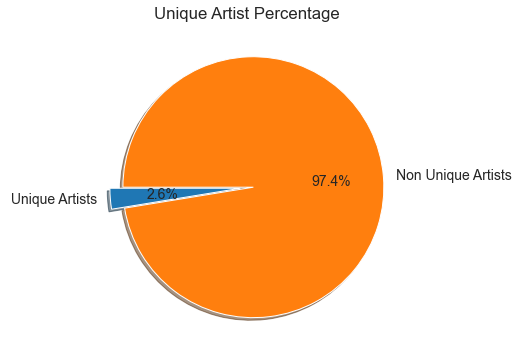

In [30]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage");

### Unique Songs


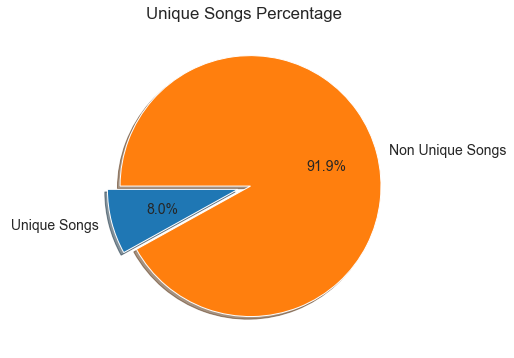

In [42]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

### Favrourite Artists (Based on hours)

In [33]:
# Grouping the Artists and sorting them
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Imagine Dragons,99.636,5978.766,2255
The Score,56.324,3382.373,1317
The Chainsmokers,53.351,3204.148,1209
5 Seconds of Summer,30.377,1822.325,734
The Vamps,24.412,1464.609,591
The Cab,22.903,1376.083,460
Why Don't We,22.159,1331.835,600
Alan Walker,18.806,1127.633,476
Maroon 5,16.043,965.082,391


### Plotting Bargraph

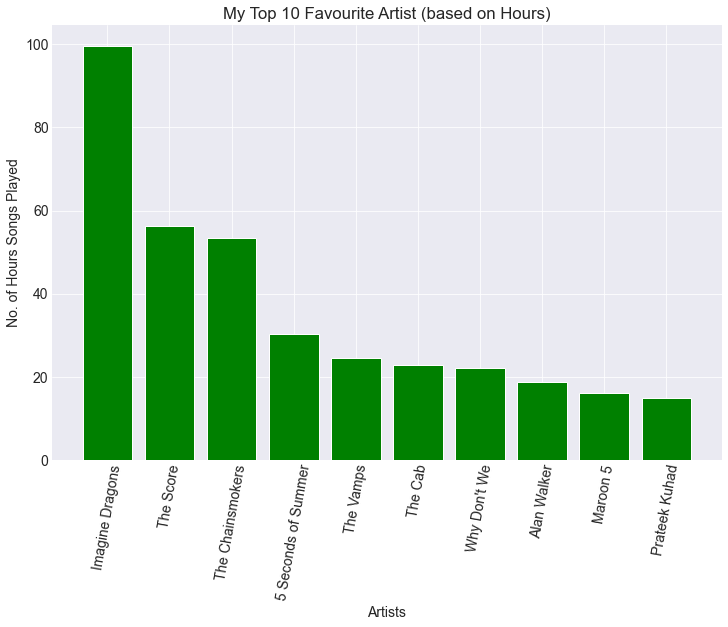

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=80);

### Favrourite Artists (Based on number of songs listened)


#### Dataset

In [37]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Imagine Dragons,99.636,5978.766,2255
The Score,56.324,3382.373,1317
The Chainsmokers,53.351,3204.148,1209
5 Seconds of Summer,30.377,1822.325,734
Why Don't We,22.159,1331.835,600
The Vamps,24.412,1464.609,591
Alan Walker,18.806,1127.633,476
The Cab,22.903,1376.083,460
Maroon 5,16.043,965.082,391


#### Plotting

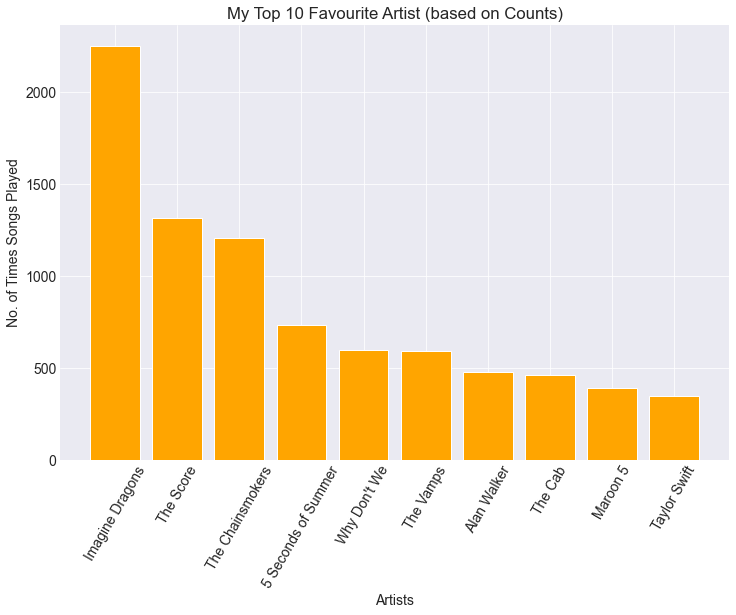

In [39]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='orange')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=60);

### Comparing Artists (Based on hours and counts )

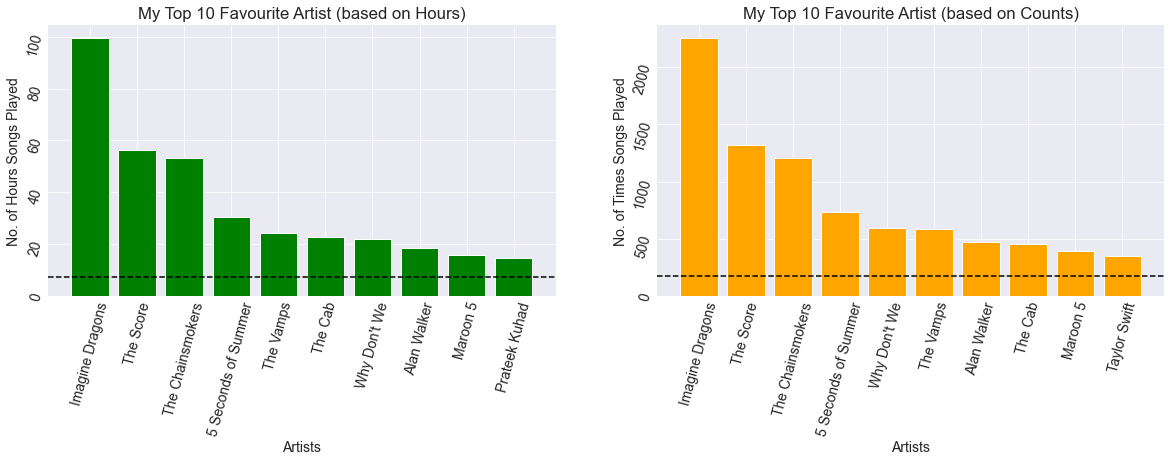

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

# Setting up our seecond graph
ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

### Favourite Artist

In [65]:
fav_artist = spotify_stream_df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Imagine Dragons        2255
The Score              1317
The Chainsmokers       1209
5 Seconds of Summer     734
Why Don't We            600
                       ... 
Halsey                   37
Anne-Marie               37
Anuv Jain                34
Bruno Major              34
Hailee Steinfeld         33
Name: Count, Length: 100, dtype: int64

#### Wordplot Presentation

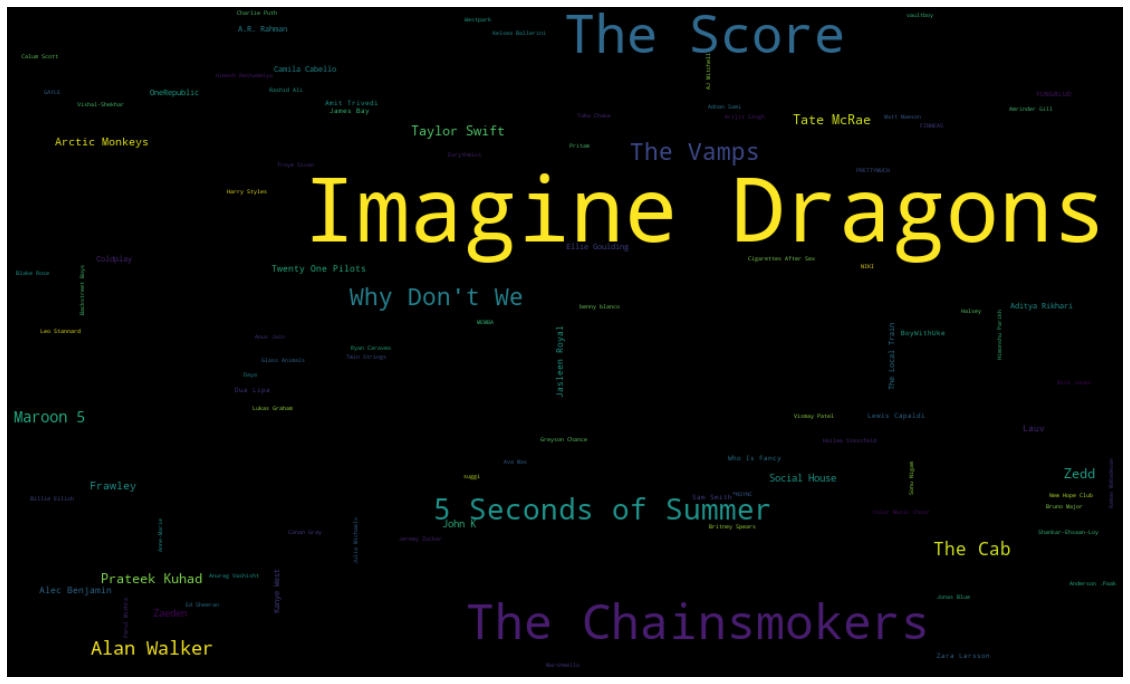

In [67]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

### Comparing Songs (Based on hours and times it is played )

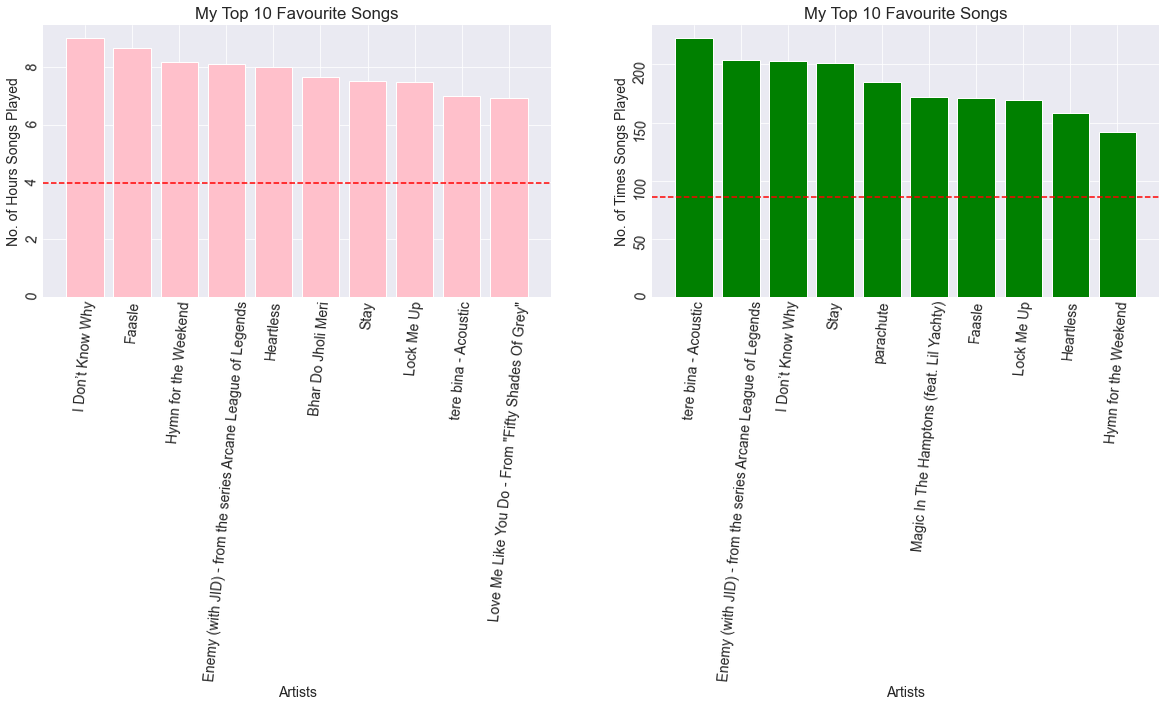

In [53]:
# Grouping songs based on hours
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
# Grouping songs based on counts
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="pink")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=85);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# Setting up our second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="green")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=85);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

### Time wise % use (Year, Month, Day, Hours)

#### EDA

In [61]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() # Summation of all 

date_df = spotify_stream_df["Play-Time"] # Making a new dataset of time only
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D") # Calulating total possible days in days
time_difference_hours = time_difference*24 # Converting that in hours by multiplying with 24
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date # Creating a new column with date
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)

print("Total Times spent on spotify in hours - ",time_spent_hours)


Total Times spent on spotify in hours -  846.6360000000002


In [63]:
most_songs.head(5)

,Count
date,
2021-11-01,200
2021-10-29,195
2021-11-21,194
2022-01-16,191
2021-09-20,189


#### Months

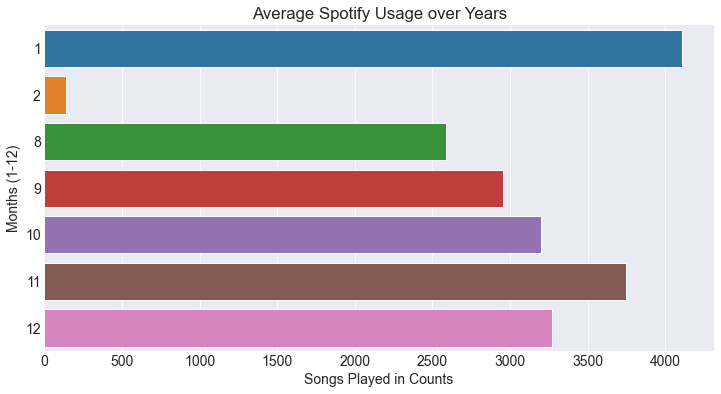

In [57]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

#### Day wise Analysis

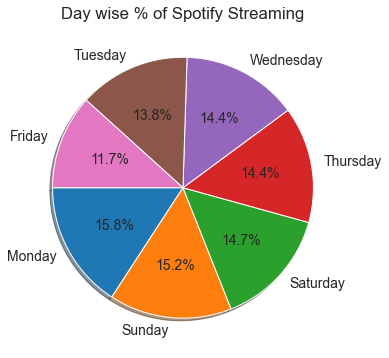

In [54]:
# Here we'll try to analyse whats is the percentage usage of Spotify Streaming over a Week.

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(spotify_stream_df["day-name"].value_counts(), labels=spotify_stream_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="Day wise % of Spotify Streaming");

##### Max number of songs played in a day

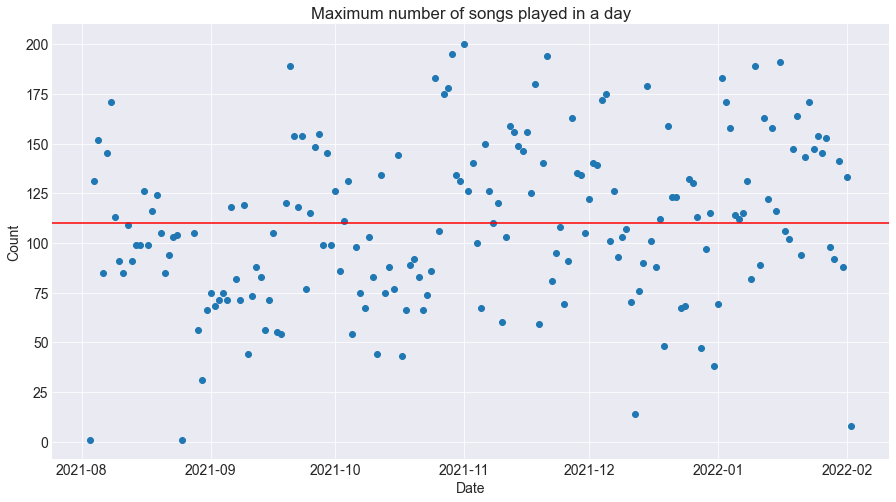

In [64]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

#### Hours wise analysis

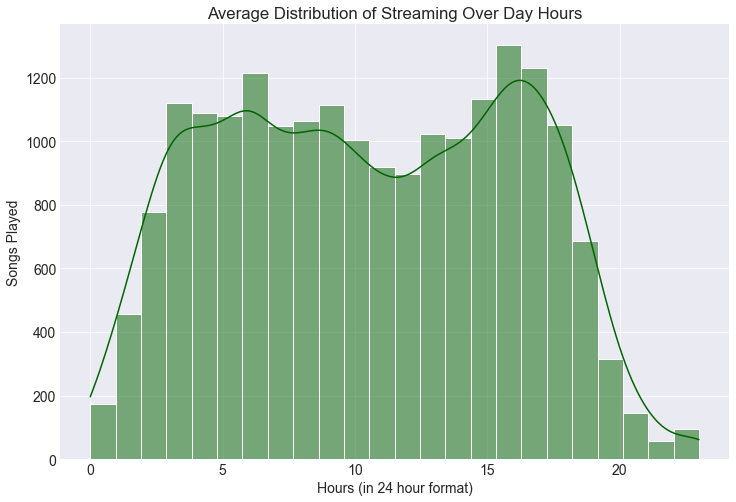

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

## Genrating Playlist


In [70]:
my_fav_artist_playlist = spotify_stream_df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist.to_csv("My_fav_playlist.csv")
my_fav_artist_playlist

Count
artistName      trackName                                                
Zaeden          tere bina - Acoustic                                  223
Imagine Dragons Enemy (with JID) - from the series Arcane Leagu...    204
                I Don’t Know Why                                      203
John K          parachute                                             185
Why Don't We    Stay                                                  177
...                                                                   ...
Glass Animals   Heat Waves                                             52
Imagine Dragons Real Life                                              51
The Score       Only One                                               51
                Where You Are                                          51
Imagine Dragons West Coast                                             51

[100 rows x 1 columns]